# Making plots with MatPlotLib

<!-- <a href="http://austringer.net/wp/index.php/2011/05/20/plotting-a-dolphin-biosonar-click-train/" target="_blank"><img src="img/mpl_dolphin_click.png" width=600px /></a> -->
<a href="http://austringer.net/wp/index.php/2011/05/20/plotting-a-dolphin-biosonar-click-train/" target="_blank"><img src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/img/mpl_dolphin_click.png" width=600px /></a>


## PHYS 2600: Scientific Computing

## Lecture 6

## MatPlotLib

One really useful feature immediately enabled by NumPy arrays is _making plots_ - let's learn how to do it with `matplotlib`!  (If you're familiar with MATLAB, `matplotlib` is intended to be familiar.  If you're not, don't worry - you don't need to know Matlab.)

If you search for info on using `matplotlib`, you may find reference to something called `pylab` in older materials.  __Do not use `pylab` anymore;__ it is "_deprecated_" (programming jargon for "still exists, but no longer maintained and you shouldn't use it anymore.")

`matplotlib` is an enormous and very powerful library!  We will stick to one way of using it: the __`pyplot` interface.__  Since this is a sub-module the import statement is long, so aliasing is useful - the standard shortname is `plt`.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 1, 300)
y = np.sin(7 * np.pi * x)
plt.plot(x, y)

# help(plt.plot)

This shows off the first function to know, `plt.plot(x,y)` - `x` and `y` are arrays.  In its simplest version, `plt.plot()` is just "connecting the dots" between the points specified in the arrays.

`plt.plot()` takes an enormous number of options, which we can use to customize its appearance.  For example, we can change it to orange and plot individual points with square markers in addition to the line:

In [ ]:
x = np.linspace(0, 1, 15)
z = plt.plot(x, x**2, color="orange", marker="s")

The [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) has lists of what the color/marker options are.  Simply searching up [matplotlib colors](https://matplotlib.org/examples/color/named_colors.html) or [matplotlib markers](https://matplotlib.org/api/markers_api.html) gives webpages with a nice visual guide.  (Using `help(plt.plot)` will show a number of these options, too.)

Let's try to plot a more interesting function, without the markers to just see the curve:

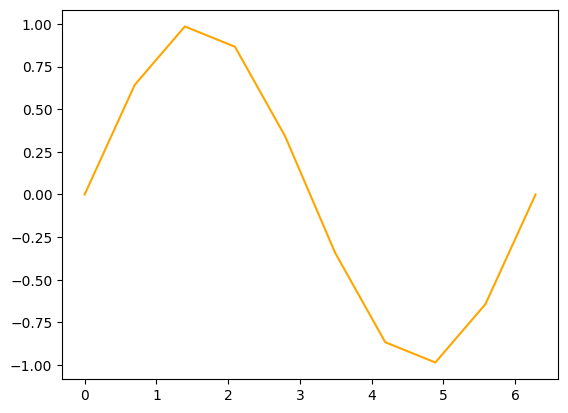

In [3]:
t = np.linspace(0, 2 * np.pi, 10)
plt.plot(t, np.sin(t), color="orange")

That's not a very nice-looking plot - `sin(t)` is supposed to be a smooth function! Why does it look like that?

What you're seeing here is a consequence of __sampling__: our array `t` only exists at 10 points in the range $(0,2\pi)$, so we can't see any details of the function at a smaller spacing.  

(Specifically, we are __undersampling__ the function, so the curve we plot doesn't match the real curve.)

We can add the markers back to the plot, and compare with using 100 points (blue curve) instead (simply calling `plt.plot()` again in the same cell):

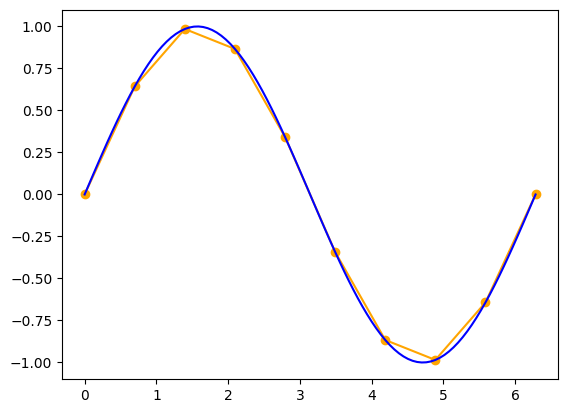

In [4]:
t2 = np.linspace(0, 2 * np.pi, 100)
plt.plot(t, np.sin(t), color="orange", marker="o")
plt.plot(t2, np.sin(t2), color="blue")

Our plotter is doing nothing more than _connecting the dots_ that we give to it!  Of course, __this is how any function plotter works__ - programs like Mathematica or other plotting software just hide it from you by default.

This might seem a little cumbersome at first, but an advantage of the way `plt.plot()` works is that there is _no difference_ between plotting functions and plotting lists of data:

Text(0.5, 1.0, 'Boulder high temp, 9/3/23 to 9/9/23')

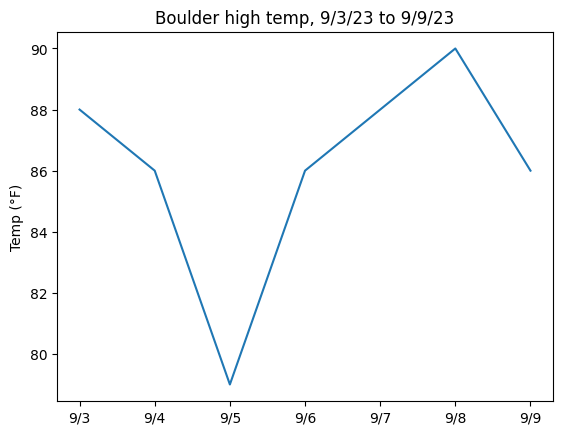

In [5]:
temps_F = np.array([88, 86, 79, 86, 88, 90, 86])
days_F = ["9/3", "9/4", "9/5", "9/6", "9/7", "9/8", "9/9"]
plt.plot(np.arange(7), temps_F)
plt.xticks(np.arange(7), labels=days_F)
plt.ylabel("Temp (°F)")
plt.title("Boulder high temp, 9/3/23 to 9/9/23")

This last example shows a little bit of how the `pyplot` interface works: instead of stuffing every formatting option into `plt.plot(...)`, we call helper functions like `plt.xticks(...)` (change x-tick labels) or `plt.ylabel(...)` (y-axis label) that *modify* the current plot.

These functions work by **side effect** on a **global state machine**: there is a “current figure/axes,” and pyplot functions mutate that state without you assigning their return values.

**Jupyter note.** With the inline backend, figures are closed after display by default, so each cell typically starts with *no current figure*. The first plotting call creates a fresh figure automatically.


Like I said at the start, Matplotlib is huge! That means there are multiple ways to do the same thing. `plt.plot(...)` is great for quick, single-axes plots. For more complex figures, prefer the **object-oriented** style that *returns* a Figure and Axes.

Two common object-oriented entry points you should know:

- `fig, ax = plt.subplots(...)` --> concise and ideal for single plots or regular grids.
- `fig = plt.figure(...); ax = fig.add_subplot(..., projection=...)` --> great when building figures incrementally or mixing 2D/3D axes.

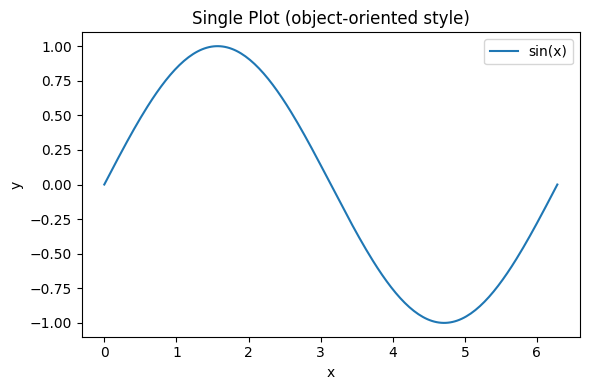

In [6]:
x = np.linspace(0, 2 * np.pi, 200)
y = np.sin(x)

# Single-axes, object-oriented style
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y, label="sin(x)")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Single Plot (object-oriented style)")
ax.legend()
fig.tight_layout()

plt.show()
plt.close()

Using `plt.subplots` makes it natural to add *multiple* subplots (a grid of Axes) while keeping everything explicit and readable:

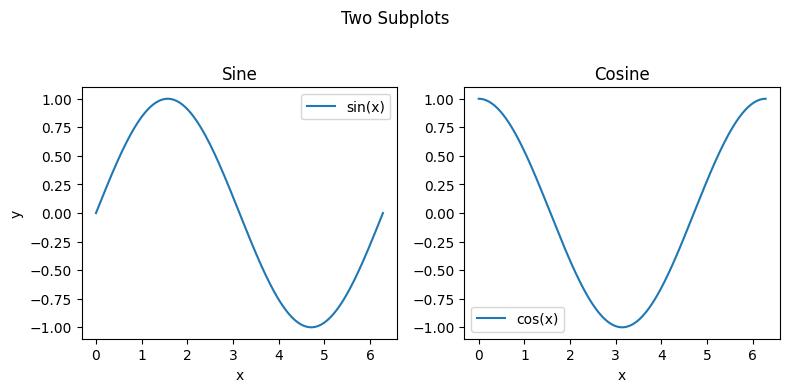

In [7]:
x = np.linspace(0, 2 * np.pi, 200)
y1 = np.sin(x)
y2 = np.cos(x)

# 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(8, 3.8))

axs[0].plot(x, y1, label="sin(x)")
axs[0].set_title("Sine")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].legend()

axs[1].plot(x, y2, label="cos(x)")
axs[1].set_title("Cosine")
axs[1].set_xlabel("x")
axs[1].legend()

fig.suptitle("Two Subplots", y=1.02, fontsize=12)
fig.tight_layout()
plt.show()

An animation with multiple/rows columns created using Matplotlib:

<video width="800" 
   src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/video/flapping_W.mp4"  
   controls
   autoplay
   loop>
</video>

### A quick preview of **3D plotting**. 

You can use `add_subplot(...)` with the `projection="3d"` keyword argument to visualize 3D data.


### The [Lorenz attractor](https://matplotlib.org/stable/gallery/mplot3d/lorenz_attractor.html):

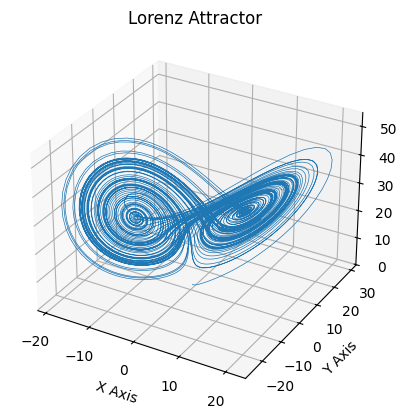

In [8]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    x, y, z = xyz
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0.0, 1.0, 1.05)
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt
X, Y, Z = xyzs.T
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(X, Y, Z, linewidth=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

### The Euclidean [heat kernel](https://en.wikipedia.org/wiki/Heat_kernel):

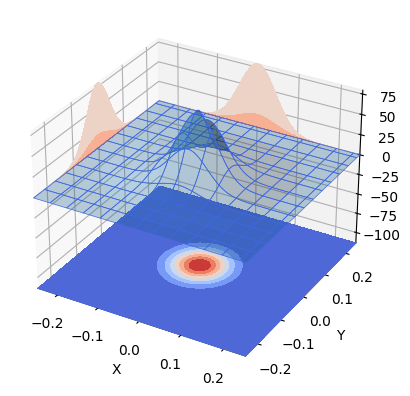

In [9]:
def heat_kernel2d(x, y, t):
    norm_xy = np.sqrt(x**2 + y**2)
    val = np.exp(-(norm_xy**2) / (4 * t)) / (4 * np.pi * t)
    return val


fig = plt.figure()
ax = fig.add_subplot(projection="3d")
xylims = [-0.25, 0.25]
t = 0.001
zlims = [-10 * heat_kernel2d(0, 0, t) / 7, heat_kernel2d(0, 0, t)]
_X, _Y = np.linspace(*xylims, 100), np.linspace(*xylims, 100)
X, Y = np.meshgrid(_X, _Y)
Z = heat_kernel2d(X, Y, t)
# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor="royalblue", lw=0.5, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
ax.contourf(X, Y, Z, zdir="z", offset=zlims[0], cmap="coolwarm")
ax.contourf(X, Y, Z, zdir="x", offset=xylims[0], cmap="coolwarm")
ax.contourf(X, Y, Z, zdir="y", offset=xylims[1], cmap="coolwarm")

ax.set(xlim=xylims, ylim=xylims, zlim=zlims, xlabel="X", ylabel="Y", zlabel="Z")

plt.show()

Another 3D animation created using Matplotlib:

<video width="800" 
   src="https://raw.githubusercontent.com/wlough/CU-Phys2600-Fall2025/main/lectures/video/lws23_Movie_S5.mp4"  
   controls
   autoplay
   loop>
</video>

<!-- 
<video width="500" 
       src="video/flapping_W.mp4"  
       controls
       autoplay
       loop>
</video>
<video width="500" 
       src="video/lws23_Movie_S5.mp4"  
       controls
       autoplay
       loop>
</video> -->


<!-- <div style="display: flex; justify-content: center; gap: 20px;">
  <video width="500" 
       src="video/flapping_W.mp4"  
       controls
       autoplay
       loop>
  </video>
  <video width="500" 
       src="video/lws23_Movie_S5.mp4"  
       controls
       autoplay
       loop>
  </video>
</div> -->



## Tutorial 6

The best way to learn `matplotlib` is to try it!  Open up tut06 and give it a try.